# Kepler's orbits

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from convert_kepler_data import read_kepler_data

In [4]:
kepler_data = read_kepler_data('kepler101data.txt')
kepler_data

array([(779., b'Kepler-101 ', b'b', 2., 3.4876812, 7.0e-06, -7.0e-06, 0.0474, 0.009 , 0.086,  8.e-02, -5.9e-02, 85.82, 1.73, -1.53, 0.16,  2.e-02, -1.e-02, b' Mass', 1.17, 0.06, 1.56, 0.2, -0.2, 288.77994, 0.00041, -0.00041),
       (780., b'Kepler-101 ', b'c', 2., 6.02976  , 7.5e-05, -7.5e-05, 0.0684, 0.0014, 0.   , -1.e+02, -1.0e+02, 84.6 , 3.4 , -3.1 , 0.01, -1.e+02, -1.e+02, b' Mass', 1.17, 0.06, 1.56, 0.2, -0.2,  65.486  , 0.0088 , -0.0088 )],
      dtype=[('RowID', '<f4'), ('SysName', 'S12'), ('planetLetter', 'S2'), ('NumberOfPlanets', '<f4'), ('Porb', '<f4'), ('ePorbU', '<f4'), ('ePorbL', '<f4'), ('a', '<f4'), ('ea', '<f4'), ('ecc', '<f4'), ('eeccU', '<f4'), ('eeccL', '<f4'), ('Incl', '<f4'), ('eInclU', '<f4'), ('eInclL', '<f4'), ('pMass', '<f4'), ('epMassU', '<f4'), ('epMassL', '<f4'), ('pMassType', 'S8'), ('sMass', '<f4'), ('esMass', '<f4'), ('sRadius', '<f4'), ('esRadiusU', '<f4'), ('esRadiusL', '<f4'), ('tTime', '<f4'), ('etTimeU', '<f4'), ('etTimeL', '<f4')])

In [5]:
kepler_data['ecc']

array([0.086, 0.   ], dtype=float32)

In [6]:
# use another function to convert this dataset into initial conditions
#  that the hermite solver is used to
from convert_kepler_data import convert_kepler_data

In [7]:
star_mass, \
planet_mass, \
planet_initial_position, \
planet_initial_velocity, ecc = convert_kepler_data(kepler_data)

In [8]:
star_mass

1.17

In [9]:
planet_mass

array([0.16, 0.01])

In [10]:
planet_initial_position

array([[-0.0433236 ,  0.        ,  0.        ],
       [ 0.06702392,  0.01365115,  0.        ]])

In [11]:
planet_initial_velocity

array([[   0.        , -141.87933522,    0.        ],
       [ -24.65587511,  121.05448789,    0.        ]])

In [13]:
# use hermite solver to solve these
from hermite_library import do_hermite
r_h, v_h, t_h, E_h = do_hermite(star_mass, 
                               planet_mass,
                               planet_initial_position, 
                               planet_initial_velocity, 
                               tfinal=1e7, Nsteps=5000)

In [15]:
r_h.shape

(3, 3, 5000)

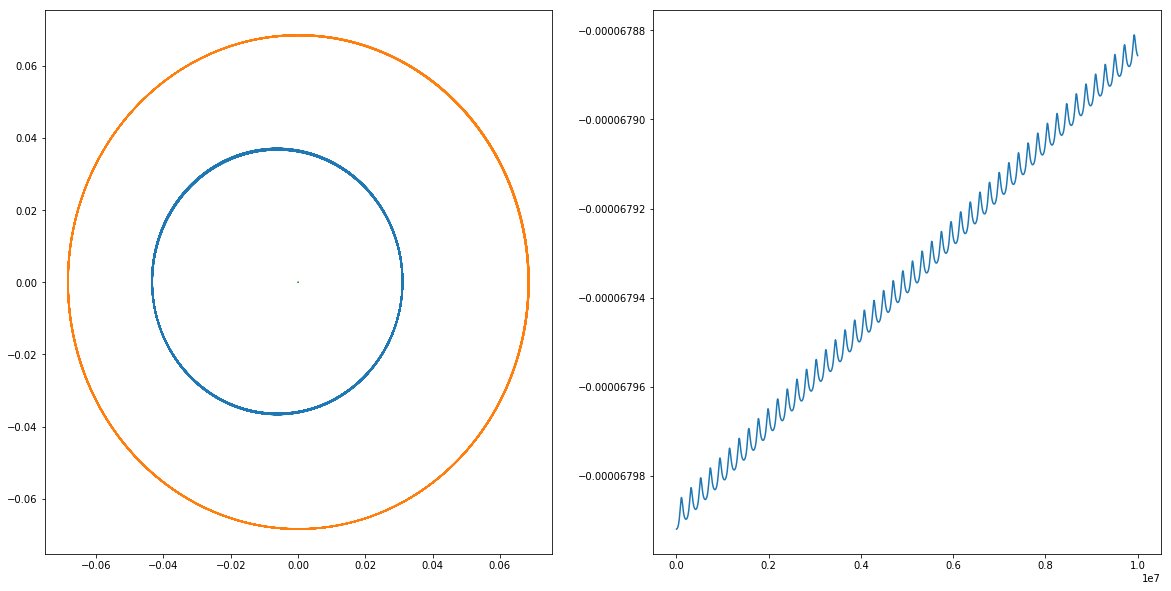

In [16]:
# we'll plot this
fig, ax = plt.subplots(1, 2, figsize=(10*2, 10))

# loop over the number of particles in this sim
# coordinate plot
for i in range(r_h.shape[0]):
    ax[0].plot(r_h[i,0,:], r_h[i, 1, :])
    
# energy plot
ax[1].plot(t_h, E_h)

plt.show()

# practice saving stuff

In [17]:
from hermite_library import save_hermite_solution_to_file

In [18]:
save_hermite_solution_to_file('myPlanetSystem_kepler101_solution1.txt',
                             t_h, E_h, r_h, v_h)

In [19]:
from hermite_library import read_hermite_solution_from_file

In [20]:
t_h2, E_h2, r_h2, v_h2 = read_hermite_solution_from_file('myPlanetSystem_kepler101_solution1.txt')

In [21]:
r_h2

array([[[-4.33185231e-02, -4.32687938e-02, -4.31196692e-02, ...,
         -3.08571374e-02, -3.23171642e-02, -3.36947781e-02],
        [-1.10710766e-07, -1.89638631e-03, -3.78830524e-03, ...,
          2.78959500e-02,  2.65522997e-02,  2.51409226e-02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 6.70290022e-02,  6.66797942e-02,  6.62916908e-02, ...,
          1.20022648e-02,  1.03755253e-02,  8.74278392e-03],
        [ 1.36510437e-02,  1.52658526e-02,  1.68717563e-02, ...,
          6.75428886e-02,  6.78085016e-02,  6.80348994e-02],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[ 5.07810205e-06,  5.07448076e-06,  5.05827564e-06, ...,
          3.90721907e-06,  4.10989277e-06,  4.30191980e-06],
        [-1.10710766e-07,  1.22285776e-07,  3.54789151e-07, ...,
         -4.16812234e-06, -3.99590079e-06, -3.814